<a href="https://colab.research.google.com/github/Arkaprabha1012/ARKA/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#PCA

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


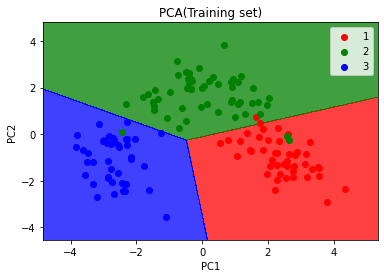

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


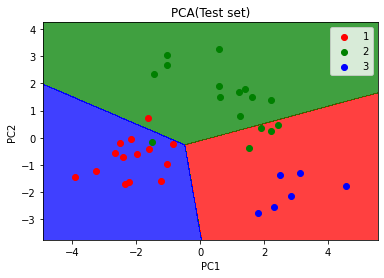

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=pd.read_csv("Wine.csv")
X=dataset.iloc[:,0:13].values
Y=dataset.iloc[:,13].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Applying PCA
'''from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_
'''
#Observe which independent variables has the impact on the dataset

#then we want most of the two principles
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

#Fitting logistic Regression MOdel on training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('PCA(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('PCA(Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=pd.read_csv("Churn_Modelling.csv")
X=dataset.iloc[:,3:13].values
Y=dataset.iloc[:,13].values

#ENCODE CATEGORICAL VARIABLE
from sklearn.preprocessing import LabelEncoder
labelencoder_x1=LabelEncoder()
labelencoder_x2=LabelEncoder()
X[:,1]=labelencoder_x1.fit_transform(X[:,1])
X[:,2]=labelencoder_x2.fit_transform(X[:,2])
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X=X[:,1:]

#Train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [3]:
#fitting XGBOOST in the training set
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [5]:
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm


array([[1521,   74],
       [ 197,  208]])

In [6]:

#accuracy
from sklearn.model_selection import cross_val_score
accracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)
#if you are working on a large dataset include n_jobs=-1 
#that will use all of your cpus


In [7]:
accracies.mean()

0.8625

In [8]:
accracies.std()

0.01017042280340401